# Homework #5

**See Canvas for HW #5 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



# This week, there won't be any "theory" homework. Please use that time to work on your project proposal.

# Problem B.1: Model Selection Criterion (55 points)

In this lesson, we will perform both the full and partial F-tests in R.

Recall again, the Amazon book data. The data consists of data on $n = 325$ books and includes measurements of:

- `aprice`: The price listed on Amazon (dollars)


- `lprice`: The book's list price (dollars)


- `weight`: The book's weight (ounces)


- `pages`: The number of pages in the book


- `height`: The book's height (inches)


- `width`: The book's width (inches)


- `thick`: The thickness of the book (inches)


- `cover`: Whether the book is a hard cover of paperback.


- And other variables...

Before we do any model selection, we'll repeat the data cleaning methods from the previous lesson on this dataset. For all tests in this lesson, let $\alpha = 0.05$.

In [1]:
# This cell loads the required packages
library(testthat)
library(tidyverse)
library(car)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks testthat::matches()
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



In [2]:
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2)
url = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/amazon.txt"))
amazon = read.csv(text = url, sep = "\t")
df = data.frame(aprice = amazon$Amazon.Price, lprice = as.numeric(amazon$List.Price),  
                pages = amazon$NumPages, width = amazon$Width, weight = amazon$Weight..oz,  
                height = amazon$Height, thick = amazon$Thick, cover = amazon$Hard..Paper)

df$lprice[which(is.na(df$lprice))] = mean(df$lprice, na.rm = TRUE)
df$weight[which(is.na(df$weight))] = mean(df$weight, na.rm = TRUE)
df$pages[which(is.na(df$pages))] = mean(df$pages, na.rm = TRUE)
df$height[which(is.na(df$height))] = mean(df$height, na.rm = TRUE)
df$width[which(is.na(df$width))] = mean(df$width, na.rm = TRUE)
df$thick[which(is.na(df$thick))] = mean(df$thick, na.rm = TRUE)
df = df[-205,]
summary(df)

Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:tidyr’:

    complete



     aprice            lprice           pages           width      
 Min.   :  0.770   Min.   :  1.50   Min.   : 24.0   Min.   :4.100  
 1st Qu.:  8.598   1st Qu.: 13.95   1st Qu.:208.0   1st Qu.:5.200  
 Median : 10.200   Median : 15.00   Median :320.0   Median :5.400  
 Mean   : 13.010   Mean   : 18.58   Mean   :335.8   Mean   :5.584  
 3rd Qu.: 13.033   3rd Qu.: 19.95   3rd Qu.:416.0   3rd Qu.:5.900  
 Max.   :139.950   Max.   :139.95   Max.   :896.0   Max.   :9.500  
     weight          height           thick       cover  
 Min.   : 1.20   Min.   : 5.100   Min.   :0.100   H: 89  
 1st Qu.: 7.80   1st Qu.: 7.900   1st Qu.:0.600   P:235  
 Median :11.20   Median : 8.100   Median :0.900          
 Mean   :12.48   Mean   : 8.161   Mean   :0.908          
 3rd Qu.:16.00   3rd Qu.: 8.500   3rd Qu.:1.100          
 Max.   :35.20   Max.   :12.100   Max.   :2.100          

### B.1. (a) The Model (20 points)

We want to determine which predictors impact the Amazon list price. Begin by fitting the full model.

Fit a model named `lmod.full` to the data with `aprice` as the response and all other rows as predictors. Then calculate the AIC, BIC and adjusted $R^2$ for this model. Store these values in `AIC.full`, `BIC.full` and `adj.R2.full` respectively. 

In [3]:
AIC.full = NA
BIC.full = NA
adj.R2.full = NA

### BEGIN SOLUTION HERE
lmod.full = lm(aprice~., data=df)
AIC.full = AIC(lmod.full)
BIC.full = AIC(lmod.full, k=log(nrow(df)))
adj.R2.full = summary(lmod.full)$adj
### END SOLUTION HERE

In [4]:
# Test Cell
# Check that the correct number of predictors were used in the model.
if(test_that("Check number of model parameters.", expect_equal(length(lmod.full$coefficients), 8))){
    print("Correct number of parameters in the model.")
}else{
    print("Make sure you're not using the Port column!")
}
### BEGIN HIDDEN TESTS
test.AIC.full = AIC(lmod.full)
test.BIC.full = AIC(lmod.full, k=log(nrow(df)))
test.adj.R2.full = summary(lmod.full)$adj
test_that("Check correctness of model criterion", {expect_equal(AIC.full, test.AIC.full, tol=1e-4)
                                                   expect_equal(BIC.full, test.BIC.full, tol=1e-4)
                                                   expect_equal(adj.R2.full, test.adj.R2.full, tol=1e-4)})
### END HIDDEN TESTS

[1] "Correct number of parameters in the model."


### B.1. (b) A Partial Model (20 points)

Fit a partial model to the data, with `aprice` as the response and `lprice`, and `pages` as predictors. Calculate the AIC, BIC and adjusted $R^2$ for this partial model. Store their values in `AIC.part`, `BIC.part` and `adj.R2.part` respectively.

In [5]:
AIC.part = NA
BIC.part = NA
adj.R2.part = NA

### BEGIN SOLUTION HERE
lmod.part = lm(aprice ~ lprice + pages, data=df)
AIC.part = AIC(lmod.part)
BIC.part = AIC(lmod.part, k=log(nrow(df)))
adj.R2.part = summary(lmod.part)$adj
### END SOLUTION HERE

In [6]:
# Test Cell
### BEGIN HIDDEN TESTS
test.AIC.part = AIC(lmod.part)
test.BIC.part = AIC(lmod.part, k=log(nrow(df)))
test.adj.R2.part = summary(lmod.part)$adj
test_that("Check correctness of second model criterion", {expect_equal(AIC.part, test.AIC.part, tol=1e-4)
                                                          expect_equal(BIC.part, test.BIC.part, tol=1e-4)
                                                          expect_equal(adj.R2.part, test.adj.R2.part, tol=1e-4)})
### END HIDDEN TESTS

### B.1. (c) Model Selection (10 points)

Which model is better, `lmod.full` or `lmod.part` according to AIC, BIC, and $R^2_a$? Note that the answer may or may not be different across the different criteria. Save your selections as `selected.model.AIC`, `selected.model.BIC`, and `selected.model.adj.R2`.

In [11]:
selected.model.AIC = NA
selected.model.BIC = NA
selected.model.adj.R2 = NA
### BEGIN SOLUTION HERE

if (AIC.part < AIC.full){
    selected.model.AIC = lmod.part
} else {
    selected.model.AIC = lmod.full
    }

if (BIC.part < BIC.full){
    selected.model.BIC = lmod.part
} else {
    selected.model.BIC = lmod.full
    }

if (adj.R2.part < adj.R2.full){
    selected.model.adj.R2 = lmod.part
} else {
    selected.model.adj.R2 = lmod.full
    }
### END SOLUTION HERE


Call:
lm(formula = aprice ~ lprice + pages, data = df)

Coefficients:
(Intercept)       lprice        pages  
  -0.727973     0.844690    -0.005824  


In [8]:
# Test Cell
### BEGIN HIDDEN TESTS
if(test_that("Checking answer is a model", expect_is(selected.model.AIC, "lm"))){
    print("Correct answer type. Make sure you're confident in your model decision.")
}else{
    print("Incorrect model type. Copy your selected model into the selected.model varaible.")
}
if(test_that("Checking answer is a model", expect_is(selected.model.BIC, "lm"))){
    print("Correct answer type. Make sure you're confident in your model decision.")
}else{
    print("Incorrect model type. Copy your selected model into the selected.model varaible.")
}
if(test_that("Checking answer is a model", expect_is(selected.model.adj.R2, "lm"))){
    print("Correct answer type. Make sure you're confident in your model decision.")
}else{
    print("Incorrect model type. Copy your selected model into the selected.model varaible.")
}

test_that("Check the correct AIC model", expect_equal(selected.model.AIC, lmod.full))
test_that("Check the correct BIC model", expect_equal(selected.model.BIC, lmod.part))
test_that("Check the correct adjusted R2 model", expect_equal(selected.model.adj.R2, lmod.part))
### END HIDDEN TESTS

[1] "Correct answer type. Make sure you're confident in your model decision."
[1] "Correct answer type. Make sure you're confident in your model decision."
[1] "Correct answer type. Make sure you're confident in your model decision."


### B.1. (d) Model Validation (5 points)

Recall that a simpler model may perform statistically worse than a larger model. Test whether there is a statistically significant difference between `lmod.part` and `lmod.full`. Based on the result of this test, what model should you use? Save your answer as `validated.model`.

In [12]:
validated.model = NA

### BEGIN SOLUTION HERE
anova(lmod.part, lmod.full) #H_0: lmod.part is sufficient
# F-Test says that there is not a significant difference, so use smaller model
validated.model = lmod.full
### END SOLUTION HERE

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
321,4574.153,NA,NA,NA,NA
316,4185.263,5,388.89,5.872473,3.312548e-05


In [10]:
# Test Cell
### BEGIN HIDDEN TESTS
test_that("Check that validated model is partial model", expect_equal(validated.model, lmod.full))
### END HIDDEN TESTS

## Problem B.2 (35 points)

`divorce` is a data frame with 77 observations on the following 7 variables.

1. `year`: the year from 1920-1996

2. `divorce`: divorce per 1000 women aged 15 or more 

3. `unemployed` unemployment rate 

4. `femlab`: percent female participation in labor force aged 16+

5. `marriage`: marriages per 1000 unmarried women aged 16+ 

6. `birth`: births per 1000 women aged 15-44 

7. `military`: military personnel per 1000 population

Here's the data:

In [11]:
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2)
url = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/divusa.txt"))
divorce = read.csv(text = url, sep = "\t")
summary(divorce)

      year         divorce        unemployed         femlab     
 Min.   :1920   Min.   : 6.10   Min.   : 1.200   Min.   :22.70  
 1st Qu.:1939   1st Qu.: 8.70   1st Qu.: 4.200   1st Qu.:27.47  
 Median :1958   Median :10.60   Median : 5.600   Median :37.10  
 Mean   :1958   Mean   :13.27   Mean   : 7.173   Mean   :38.58  
 3rd Qu.:1977   3rd Qu.:20.30   3rd Qu.: 7.500   3rd Qu.:47.80  
 Max.   :1996   Max.   :22.80   Max.   :24.900   Max.   :59.30  
    marriage          birth           military     
 Min.   : 49.70   Min.   : 65.30   Min.   : 1.940  
 1st Qu.: 61.90   1st Qu.: 68.90   1st Qu.: 3.469  
 Median : 74.10   Median : 85.90   Median : 9.102  
 Mean   : 72.97   Mean   : 88.89   Mean   :12.365  
 3rd Qu.: 80.00   3rd Qu.:107.30   3rd Qu.:14.266  
 Max.   :118.10   Max.   :122.90   Max.   :86.641  

**B.2 (a) (10 points) Using the `divorce` data, with `divorce` as the response and all other variables as predictors, select the "best" regression model, where "best" is defined using AIC. Save your final model as `lm_divorce`.**


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



(Intercept),year,unemployed,femlab,marriage,birth,military
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] 418.1050 304.3781 209.8410 183.0799 162.1228 160.1975


Call:
lm(formula = divorce ~ . - unemployed, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7586 -1.0494 -0.0424  0.7201  3.3075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 405.61670   95.13189   4.264 6.09e-05 ***
year         -0.21790    0.05078  -4.291 5.52e-05 ***
femlab        0.85480    0.10276   8.318 4.29e-12 ***
marriage      0.15934    0.02140   7.447 1.76e-10 ***
birth        -0.11012    0.01266  -8.700 8.43e-13 ***
military     -0.04120    0.01360  -3.030  0.00341 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.511 on 71 degrees of freedom
Multiple R-squared:  0.9336,	Adjusted R-squared:  0.929 
F-statistic: 199.7 on 5 and 71 DF,  p-value: < 2.2e-16


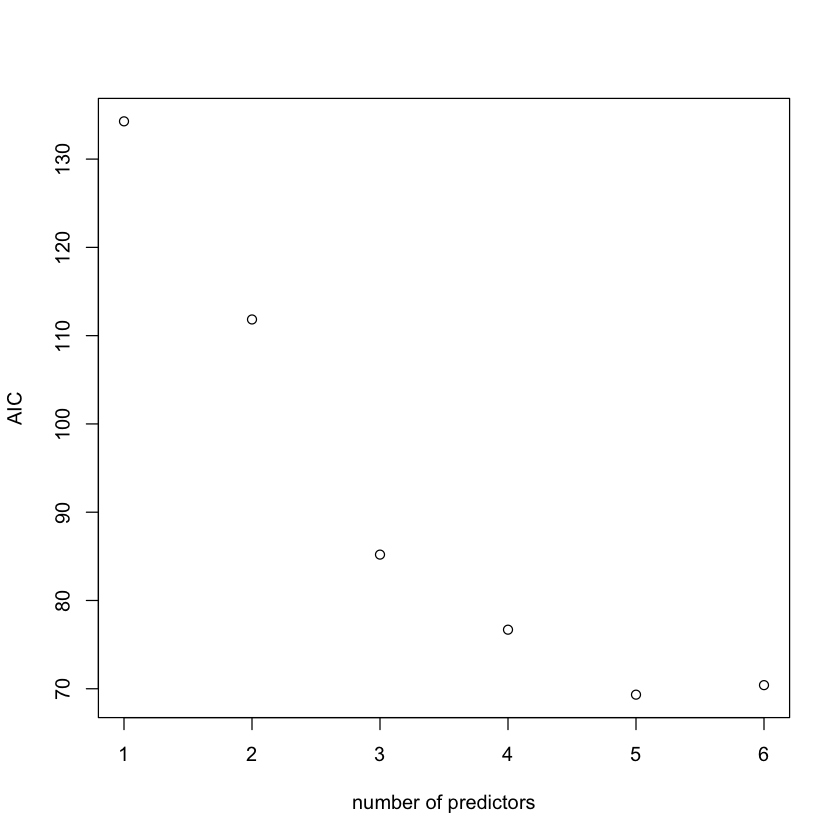

In [12]:
library(leaps)
library(MASS)

### BEGIN SOLUTION HERE
n = dim(divorce)[1]; 
reg1 = regsubsets(divorce ~ ., data = divorce)
rs = summary(reg1)
rs$which
rs$rss
AIC = 2*(2:7) + n*log(rs$rss/n) 
plot(AIC ~ I(1:6), xlab = "number of predictors", ylab = "AIC")

lm_divorce = lm(divorce ~ .-unemployed, data = divorce)
summary(lm_divorce)
### END SOLUTION HERE


In [13]:
# Test Cell
### BEGIN HIDDEN TESTS
lm_divorce_solution = lm(divorce ~ .-unemployed, data = divorce)
test_that("Check that validated model is partial model", expect_equal(lm_divorce, lm_divorce_solution))
### END HIDDEN TESTS

**B.2 (b) (15 points) Using your model from part (a), compute the variance inflation factors VIFs for each $\widehat\beta_j$, $j = 1,...,p$. Store them in the variable `v`. Also, compute the condition number for the design matrix, stored in `k`. Is there evidence that collinearity causes some predictors not to be significant? Explain your answer.**

In [14]:
X = model.matrix(lm_divorce); A = t(X)%*%X; e = eigen(A); k = sqrt(max(e$values)/min(e$values)); k
#Or: kappa(X, exact = TRUE)
v = vif(lm_divorce); v
co = cor(X[,-1])
summary(lm_divorce)

[1] 1083823

year    femlab  marriage     birth  military 
42.948267 48.650935  2.624531  2.031677  1.358002


Call:
lm(formula = divorce ~ . - unemployed, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7586 -1.0494 -0.0424  0.7201  3.3075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 405.61670   95.13189   4.264 6.09e-05 ***
year         -0.21790    0.05078  -4.291 5.52e-05 ***
femlab        0.85480    0.10276   8.318 4.29e-12 ***
marriage      0.15934    0.02140   7.447 1.76e-10 ***
birth        -0.11012    0.01266  -8.700 8.43e-13 ***
military     -0.04120    0.01360  -3.030  0.00341 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.511 on 71 degrees of freedom
Multiple R-squared:  0.9336,	Adjusted R-squared:  0.929 
F-statistic: 199.7 on 5 and 71 DF,  p-value: < 2.2e-16


In [15]:
# Test Cell
### BEGIN HIDDEN TESTS
X_solution = model.matrix(lm_divorce_solution); A_solution = t(X_solution)%*%X_solution; e_solution = eigen(A_solution); 
k_solution = sqrt(max(e_solution$values)/min(e_solution$values));
#Or: kappa(X, exact = TRUE)
v_solution = vif(lm_divorce_solution)
co = cor(X_solution[,-1])
test_that("Check VIF", expect_equal(v_solution, v))
test_that("Check k", expect_equal(k_solution, k))
### END HIDDEN TESTS

The condition number, $\kappa$, measures the relative sizes of the eigenvalues. $\kappa \ge 30$ may be cause for concern. In this case, the condition number is very large. We can also see from the predictor correlation matrix that there are high pairwise correlations.

#### B.2 (c) (10 points) Remove the predictor with the highest VIF. Does that reduce the multicollinearity?  

In [16]:
lmod2 = lm(divorce ~ year + marriage + birth + military, data = divorce)
summary(lmod2)
vif(lmod2)
X2 = model.matrix(lmod2); A2 = t(X2)%*%X2; e = eigen(A2); k2 = sqrt(max(e$values)/min(e$values)); k2
cor(X2[,-1])


Call:
lm(formula = divorce ~ year + marriage + birth + military, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3582 -1.4479 -0.0957  1.5513  4.1165 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.654e+02  2.993e+01 -12.206  < 2e-16 ***
year         1.954e-01  1.464e-02  13.344  < 2e-16 ***
marriage     9.991e-02  2.814e-02   3.550 0.000683 ***
birth       -1.265e-01  1.745e-02  -7.250 3.82e-10 ***
military     5.578e-03  1.728e-02   0.323 0.747764    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.109 on 72 degrees of freedom
Multiple R-squared:  0.8689,	Adjusted R-squared:  0.8617 
F-statistic: 119.3 on 4 and 72 DF,  p-value: < 2.2e-16


year marriage    birth military 
1.833706 2.331921 1.982541 1.125807

[1] 244324

,year,marriage,birth,military
year,1.000000000,-0.6173255,-0.5763140,0.007267171
marriage,-0.617325533,1.0000000,0.6737273,0.258198260
birth,-0.576313991,0.6737273,1.0000000,0.140898643
military,0.007267171,0.2581983,0.1408986,1.000000000


We see some reduction in the condition number and the VIFs. However, we haven't eliminated the high pairwise correlations, so collinearity still exists.